### **Required Libraries and Imports**


##### **Imports**

In [2]:
# general imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date

import plotly.express as px

import warnings
warnings.filterwarnings("ignore")


%load_ext autoreload
%autoreload 2

<br><br>

### **Data Acquisition**

<br>

To start, we consider any infinite values as missing values. This simplifies the process of understanding and gathering information from the data.

In [4]:
pd.set_option('use_inf_as_na',True)

Afterward, we import the data using a pandas function called 'read_csv'. This function utilizes the path held in the variable in the cell below, indicating the specific location where the data is stored. The respective dataset is stored in 'info'.

In [5]:
path = "./data/"
info = pd.read_csv(path +"Customer Info Dataset.csv")

<br><br>

### **Data Exploration**

<br>

**1. Using the ``.head`` method** 

Now that we imported the data, we can start exploring it. The first method used to do that is ``.head``, which enables the visualization of the first five rows of a given data set.

In [6]:
info.head()

,customer_id,customer_name,customer_gender,customer_birthdate,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,...,lifetime_spend_meat,lifetime_spend_fish,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude
0,4239,Sara Moscowitz,female,09/10/1999 03:11 PM,0.0,0.0,0.0,2.0,91.0,20.0,...,53.0,48.0,47.0,105.0,85.0,0.192154,2017.0,NaN,38.754263,-9.163397
1,19330,Donald Robertson,male,06/26/1981 10:58 PM,1.0,0.0,0.0,2.0,197.0,5958.0,...,86.0,80.0,45.0,1964.0,85.0,0.098647,2015.0,NaN,38.777761,-9.156197
2,2272,Phd. Felicia Bradshaw,female,01/31/1987 09:08 AM,1.0,1.0,0.0,20.0,397.0,20.0,...,204.0,170.0,46.0,5.0,408.0,0.497251,2008.0,NaN,38.785329,-9.127113
3,25288,Emma Williams,female,06/17/1942 12:02 AM,3.0,4.0,1.0,2.0,5282.0,237.0,...,1081.0,1068.0,617.0,1078.0,1956.0,0.206713,2010.0,NaN,38.744086,-9.156589
4,12829,Hilda Huerta,female,01/31/2000 11:43 AM,0.0,0.0,0.0,2.0,82.0,22.0,...,39.0,39.0,48.0,103.0,83.0,0.200625,2015.0,NaN,38.756024,-9.162970


By the usage of this method, we have an initial visualization of the data in hands. It can be concluded that we have a sufficiently large amount of columns (specifically twenty four), such that not all of them can be visualized. 
It can also be detected some characteristics in the data, such as:
* The variable 'customer_name' includes the education level of each customer;
* The variables 'customer_birthdate' and 'year_first_transaction' are not in the most desirable format;
* The variables 'kids_home' and 'teens_home' could be joined and stored in one variable;
* The variable 'loyalty_card_number' seems to contain several missing values.

<br>

**2. Using the ``.info`` method** 

To have a better look at the issues described above, it is used the method `.info`, which displays information about the amount of missing values, columns and data types present in the data set.

In [7]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customer_id                              30000 non-null  int64  
 1   customer_name                            30000 non-null  object 
 2   customer_gender                          30000 non-null  object 
 3   customer_birthdate                       30000 non-null  object 
 4   kids_home                                30000 non-null  float64
 5   teens_home                               30000 non-null  float64
 6   number_complaints                        30000 non-null  float64
 7   distinct_stores_visited                  30000 non-null  float64
 8   lifetime_spend_groceries                 30000 non-null  float64
 9   lifetime_spend_electronics               30000 non-null  float64
 10  typical_hour                             29998

Given this insight into the existing variables, it is observable that there are categorical (object) and numerical (float and int) data in this data set, which contains three thounsand rows and twenty four columns. It is also important to note that there is a significante amount of missing values in the variables 'lifetime_spend_videogames' and 'loyal_card_number', and only two in the variable 'typical_hour'.

<br>

**2. Using the ``.describe`` method** 

For a broader view of the data, it is possible to get the main descriptive statistics for all its variables using the method `.describe`. To be able to visualize the values for all the twenty four variables, it is used the method `.T`, which transposes the data set for means of visualization.


In [8]:
info.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,30000.0,15000.500000,8660.398374,1.000000,7500.750000,15000.500000,22500.250000,30000.000000
kids_home,30000.0,1.146700,1.234111,0.000000,0.000000,1.000000,1.000000,10.000000
teens_home,30000.0,0.512933,0.912502,0.000000,0.000000,0.000000,1.000000,9.000000
number_complaints,30000.0,0.764367,0.836341,0.000000,0.000000,1.000000,1.000000,9.000000
distinct_stores_visited,30000.0,6.120767,6.511410,0.000000,2.000000,3.000000,8.000000,21.000000
lifetime_spend_groceries,30000.0,3978.634251,5280.641466,0.000000,220.000000,950.000000,5253.000000,18852.000000
lifetime_spend_electronics,30000.0,965.238793,1755.323397,1.058527,45.000000,194.000000,721.000000,6603.000000
typical_hour,29998.0,14.357796,NaN,0.000000,9.000000,14.000000,20.000000,23.000000
lifetime_spend_vegetables,30000.0,564.207835,481.819086,1.000000,247.000000,425.000000,785.000000,1568.000000
lifetime_spend_nonalcohol_drinks,30000.0,628.750142,496.346400,0.000000,244.000000,425.000000,949.000000,1671.000000


This output can be very useful to understand the data and the different types of values that holds.
Some characteristics of the data can be observed, such as:
* There are several columns with a minimum value of zero, which is coherent with their context (e.g. 'kids_home', 'teens_home' and 'number_complaints');
* The variable 'typical_hour' is not in the most desirable format;
* There is only one column with negative values: 'longitude'. Yet again, the values are coherent with its context.
* There are features in which the third quartile value is significantly lower than the maximum (e.g., 'lifetime_spend_groceries' and 'lifetime_spend_fish'). These features also exhibit a high standard deviation and will be examined in greater detail in subsequent steps
* The minimum value of 'lifetime_total_distinct_products' is zero, which may not coherent with the data in hands.

To explore in more detail the last observation made, it is used a condition on the 'info' data set, in such a way that all the customers that have a value zero in the 'lifetime_total_distinct_products' column are displayed.

In [9]:
info[info['lifetime_total_distinct_products'] == 0]

,customer_id,customer_name,customer_gender,customer_birthdate,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,...,lifetime_spend_meat,lifetime_spend_fish,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude
2368,2508,Msc. Crystal Sumrall,female,08/02/1955 09:36 PM,1.0,0.0,1.0,2.0,923.0,1293.0,...,127.0,151.0,45.0,199.0,0.0,0.099301,2009.0,NaN,38.740427,-9.150095
2611,13645,Arthur Good,male,08/31/1998 12:22 PM,1.0,0.0,1.0,2.0,837.0,651.0,...,241.0,318.0,46.0,205.0,0.0,0.108731,2009.0,NaN,38.747253,-9.145146
4568,2895,Msc. Irene Salazar,female,05/10/1953 06:01 PM,0.0,1.0,0.0,1.0,425.0,796.0,...,31.0,103.0,49.0,196.0,0.0,0.119658,2013.0,NaN,38.739644,-9.151904
11184,1355,Msc. Raymond Kirk,male,04/22/1988 07:19 PM,0.0,1.0,0.0,3.0,1181.0,447.0,...,216.0,288.0,49.0,202.0,0.0,0.105571,2010.0,991161.0,38.758978,-9.132997
11576,1886,Bsc. William Garza,male,02/04/1988 11:48 PM,0.0,1.0,1.0,2.0,1340.0,998.0,...,170.0,348.0,44.0,207.0,0.0,0.131994,2010.0,NaN,38.716146,-9.184637
11924,12206,Ruth Dews,female,06/12/1954 04:50 AM,0.0,1.0,1.0,2.0,521.0,542.0,...,51.0,236.0,47.0,202.0,0.0,0.083982,2010.0,NaN,38.711069,-9.140783
12396,24957,Jack Palumbo,male,11/06/1998 11:56 PM,0.0,0.0,0.0,2.0,500.0,182.0,...,144.0,173.0,48.0,203.0,0.0,0.085183,2010.0,NaN,38.742444,-9.167086
13184,17644,Shari Roberts,female,10/06/1991 11:07 PM,1.0,1.0,0.0,2.0,47.0,1194.0,...,139.0,66.0,50.0,195.0,0.0,0.120369,2011.0,NaN,38.770907,-9.126343
16222,19333,Sean Faust,male,06/04/1969 06:28 AM,1.0,1.0,1.0,3.0,436.0,216.0,...,211.0,176.0,53.0,201.0,0.0,0.114510,2013.0,NaN,38.730905,-9.119633
21719,5135,Msc. Royce Isley,male,05/20/1953 10:44 AM,0.0,1.0,1.0,1.0,639.0,159.0,...,343.0,183.0,51.0,202.0,0.0,0.098901,2007.0,NaN,38.761801,-9.123314


The output shows sixteen distinct customers who appear to have never bought a product but have spent money in different sections, such as groceries and electronics. Thus, we consider these values an error, caused by unknown factors, that seem to affect solely the variable 'total_lifetime_distinct_products'. This issue will be addressed in the phase of the project when clustering techniques are tested, in such a way that it will be determined if it is necessary to exclude or change the respective variable.

<br><br>

**3. Using the Correlation Matrix** 

In clustering algorithms, highly correlated variables can artificially inflate the importance of certain features, leading to biased cluster assignments. Removing highly correlated variables can help to alleviate this issue and ensure a more accurate clustering. 

The correlation between variables can be visualized using a correlation matrix. Its use can assist us in recognizing which variables can be dropped and perhaps whether new variables can be created from linear combinations of the remaining ones.

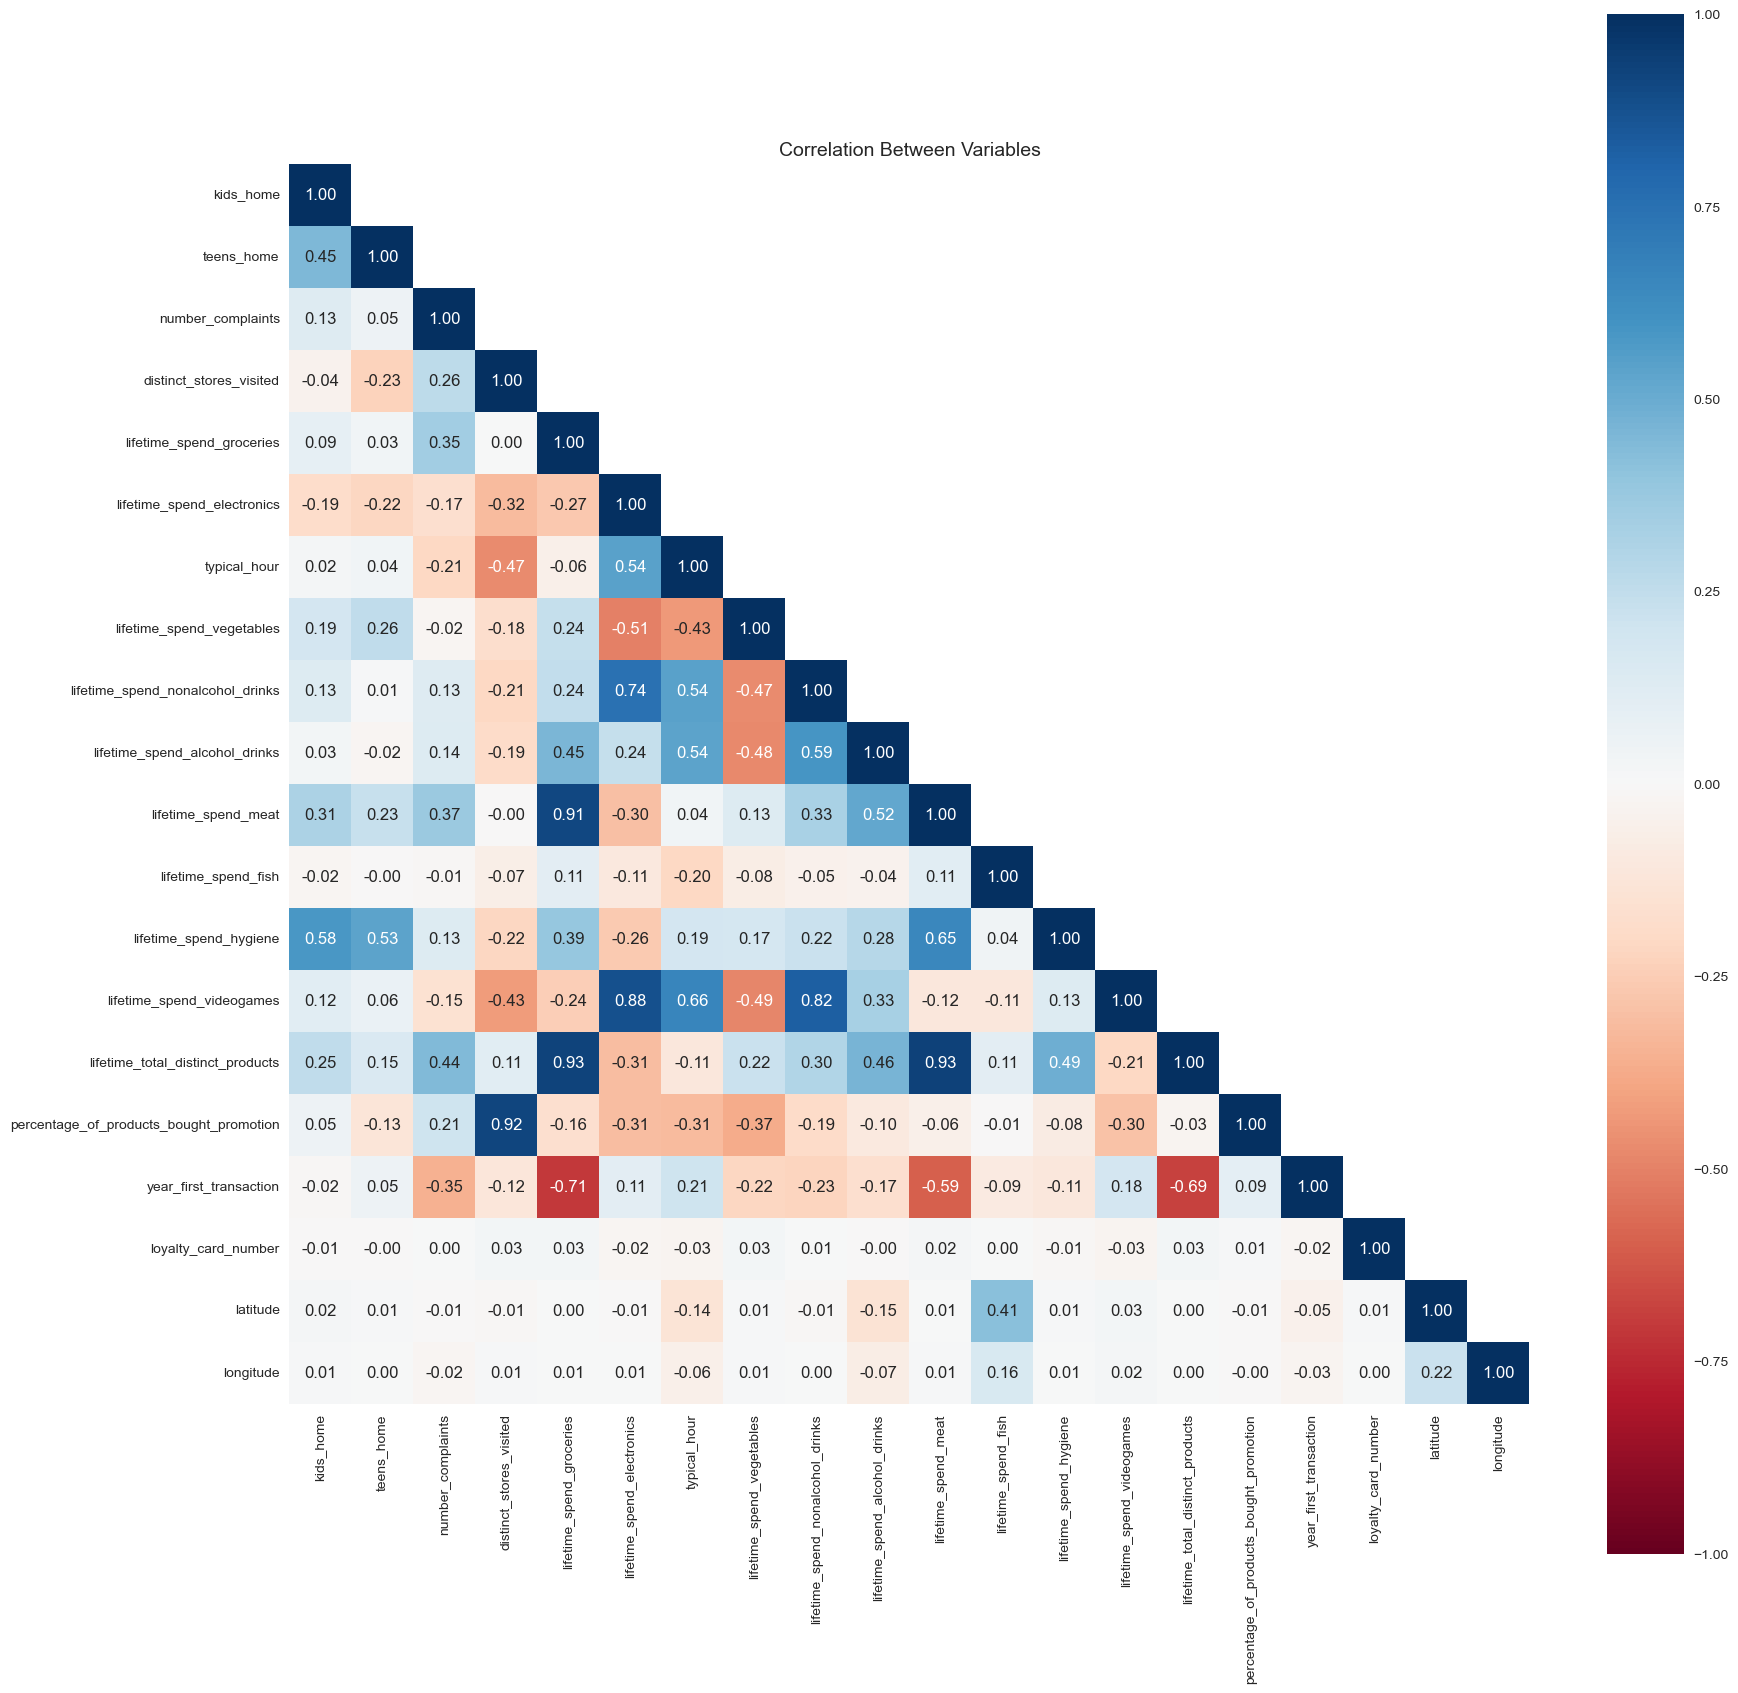

In [10]:
# initial correlation matrix with the respective values
corr_matrix = info.drop(list(info.select_dtypes(include=['object']).columns) + ['customer_id'], axis=1).corr()


mask = np.tri(*corr_matrix.shape, k=0, dtype=bool)
# Keeps values where mask is True
corr_matrix = corr_matrix.where(mask) 

# defines the figure size
fig, ax = plt.subplots(figsize=(20, 20))
# heatmap of the initial correlation matrix
l = sns.heatmap(corr_matrix, square=True, annot=True, fmt=".2f", vmax=1, vmin=-1, cmap='RdBu', ax=ax)
plt.title('Correlation Between Variables', size=14)
plt.show()

Considering the strong positive and negative linear relationships of variables, for which it is considered a correlation coefficient stronger than - 0.70 and 0.70, the following pairs were identified: 
- year_first_transaction and lifetime_spend_groceries (-0.71)
- lifetime_spend_eletronics and lifetime_spend_nonalcohol_drinks (0.74)
- lifetime_spend_videogames and lifetime_spend_groceries (0.88)
- lifetime_spend_meat and lifetime_spend_groceries (0.91)
- percentage_of_products_bought_promotion and distinct_stores_visited (0.92)
- lifetime_total_distinct_products and lifetime_spend_groceries (0.93)
- lifetime_total_distinct_products and lifetime_spend_meat (0.93)

<br>
Among the correlations mentioned, the ones that seem most relevant to highlight are shown in the correlation matrix below.

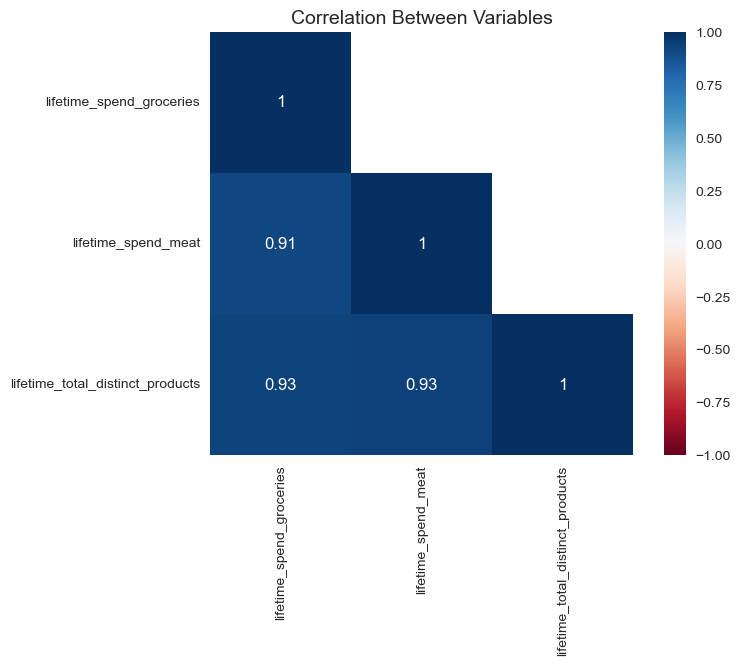

In [11]:
# initial correlation matrix with the respective values
corr_matrix = info[['lifetime_spend_groceries', 'lifetime_spend_meat', 'lifetime_total_distinct_products']].corr()


mask = np.tri(*corr_matrix.shape, k=0, dtype=bool)
# Keeps values where mask is True
corr_matrix = corr_matrix.where(mask) 

#acho q n é util
sns.heatmap(corr_matrix,square=True, annot=True, vmax=1, vmin=-1, cmap='RdBu')
plt.title('Correlation Between Variables', size=14)
plt.show()

The output image shows a distinctively high correlation among the three variables, 'lifetime_spend_groceries', 'lifetime_spend_meat' and 'lifetime_total_distinct_products'.
Thus, these variables are likely to explain each other's behaviour and may add redundancy to the clusters. This will be accessed during the creation of the clusters.

<br><br>

### **Identification and treatment of possible data inconsistencies**

**1. Missing values**

In the 'Data Exploration' section there were missing values identified on the variable 'lifetime_spend_videogames'. Hence, those values are replaced by zero, assuming that these clients did not spend money on videogames.

In [12]:
info["lifetime_spend_videogames"] = info["lifetime_spend_videogames"].fillna(0)

<br>
<br>

### **Feature engineering**

<br>
Through the correlation matrices and other visualization tools utilized, it was possible to envision new variables that can be formed by means of a linear combination of existent variables, or conditions under them.
 
The respective features are created and described in the cells below.

<br>

**1. Transforming year-related variables**

In these first transformations, the current year of reference, 2023, is used to have the calculations simplified.

Instead of having information about the year that a customer had their first transaction, it is more meaningul to know the customer tenure, which helps to simplify analysis. In the code below the respective change is conducted and stored in the new column 'years_as_customer'.

In [14]:
info['years_as_customer'] = 2023 - info["year_first_transaction"]

Another useful transformation is to extract the customer's age from their date of birth, as this allows for easier interpretation. This is performed in the code below.

In [15]:
info["customer_age"] =  2023 - pd.to_datetime(info["customer_birthdate"]).dt.year

<br>

**2. Transforming 'customer_name' into 'education' and 'customer_name'**

As previously mentioned, the feature 'column_name' contains information about the customer's name and education level. Therefore, it is split into two different features: 'customer_name', which will solely contain the customer's name and the 'customer_education', which will carry their education level. If the customer does not have an explicit education level, it will be stored with the value 'basic'. 

In [16]:
# apply split() method to split on '.' and access the first item in the list, since the names are in the format '<education level>. <customer's name>' or '<customer's name>'
info['education'] = info['customer_name'].apply(lambda x: x.split('.')[0] if len(x.split('.')) == 2 else 'basic')

# access the last item in the list
info['customer_name'] = info['customer_name'].apply(lambda x: x.split('.')[-1])

<br> 

**3. Creating dummy variables**

By performing the transformation of numerical variables into binary, it becomes easier to examine the impact of those variables on some variables of interest, such as expenses related to the different sections available. This will be useful to examine the clusters in the next notebooks.

The first dummy transformation conducted is to create a variable 'has_child' which carries information about whether a specific customer has children. This new variable is created through the sum of the existent variables 'kids_home' and 'teens_home', and if it is larger than zero, the customer has at least one child and the value of 'has_child' is 1, otherwise it is 0.

In [17]:
info['has_child'] = info[['kids_home', 'teens_home']].apply(lambda row: 1 if row.sum() > 0 else 0, axis=1)

The same can be applied for customers to have information about the loyalty card ownership. In the 'Data Exploration' section, it was observed that the variable 'loyalty_card_number' had several missing values, which are considered to inform that the corresponding customers do not own a loyalty card. Therefore, it is straightforward to create a new column 'has_loyalty_card' which contains the value 1 if the corresponding customer does not have a missing value in the column 'loyalty_card_number', and 0 otherwise.

In [18]:
info['has_loyalty_card']= info['loyalty_card_number'].fillna('Na').apply(lambda x: 0 if x == 'Na' else 1).astype(int)

<br>

**4. Creating variables through linear combination**

Linear combination may be very useful to extract relevant variables from the ones included in the initial data set. In this project, the linear combinations performed are based on the addition of different variables.

Firstly, the feature 'num_kids' is created through the sum of the features 'kids_home' and 'teens_home' for each customer. This is useful, since the parents of kids and teens share several characteristics, such as their prioritizing needs and possibly budgeting.

In [19]:
info['num_kids'] = info['kids_home'] + info['teens_home']

The last variable extracted from the initial data set is named 'total_spend'. This new variable is obtained through the sum of the values of each column whose name starts with 'lifetime_spend', i.e., it includes the total amount of money each customer spent in the considered timeline. To create this variable, we consider all the variables that start with 'lifetime_spend' as not being included in one another, e.g., 'lifetime_spend_meat' is not included in 'lifetime_spend_groceries'.

In [20]:
info['total_spend'] = sum(info[column_name] for column_name in info.columns if column_name[:14] == 'lifetime_spend')

<br><br>

### **Feature Selection**

In order to only have relevant variables in the final 'info' data set, some of the initial columns will be removed. The removal of these columns will be based on the data exploration and the remaing sections which have constituted this initial process of the project.

The specific variables that will be discarded are those that were not in the most desirable format, and were enventually used to create new features in the 'Features Extraction' section, that were more useful. These variables are: 'customer_birthdate', 'loyalty_card_number', 'kids_home', 'teens_home' and 'year_first_transaction'.

In [21]:
info = info.drop(["customer_birthdate",'loyalty_card_number',"kids_home","teens_home", "year_first_transaction"],axis=1)

<br><br>

### **Data Visualization**

Data visualization is the process of representing data in a visual and easily understandable form, such as charts, graphs, and maps. It involves the use of visual elements like colors, shapes, and patterns to convey information and insights from data sets.

<br>

**1. Scatter mapbox**

In the code below, it is displayed a Scatter mapbox, that using the values for latitude and longitude, shows the location of the residence of each customer.

In [21]:
fig = px.scatter_mapbox(info, lat='latitude', lon='longitude',
                        mapbox_style='open-street-map', zoom=10,
                        center = {"lat":38.76 , "lon":-9.15},
                        width = 600,
                        height = 600
                        )
# Show the map
fig.show()

The map above informs us that all the customer's residences are located in Lisbon. 

<br>

**2. Education pie chart**

To know the distribution of the variable 'Education', a pie chart is used.

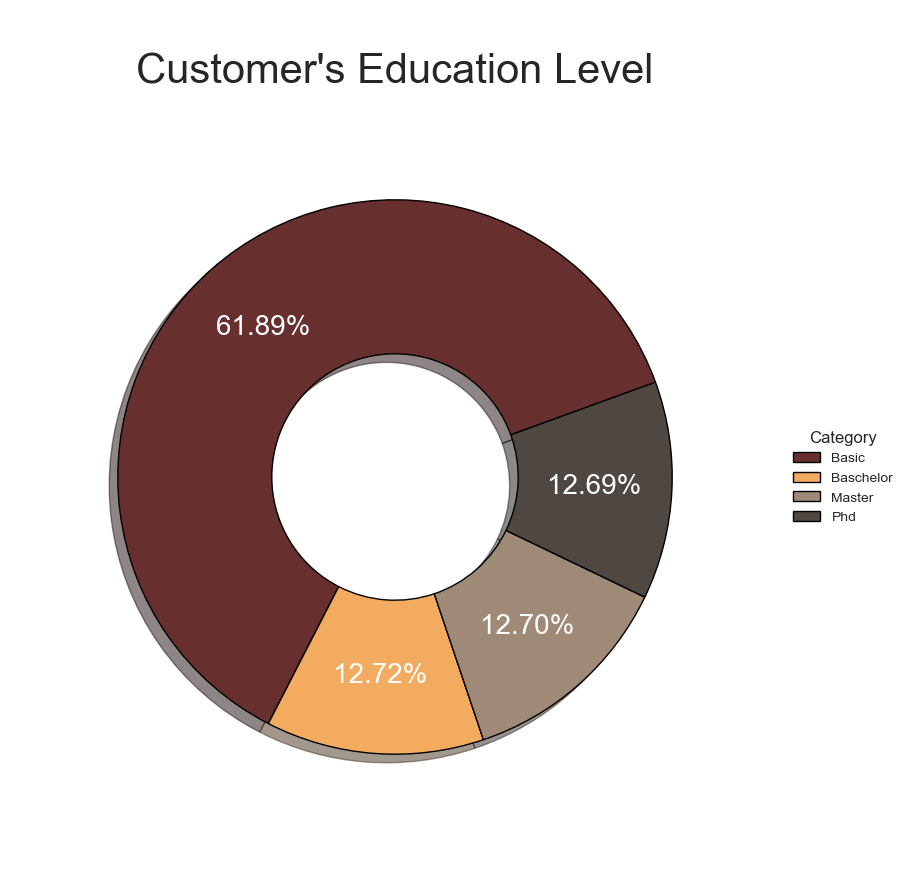

In [24]:
sns.set_style("white")

plt.subplots(figsize=(10, 10))

labels = "Basic","Baschelor","Master", "Phd"
size = 0.5

colors = ["#682F2F", "#F3AB60", "#9c754e", "#e38019"]  # Unique colors for each education level


wedges, texts, autotexts = plt.pie([info["education"].value_counts()[0],
                                    info["education"].value_counts()[1],
                                    info["education"].value_counts()[2],
                                    info["education"].value_counts()[3]],
                                    explode = (0,0,0,0),
                                    textprops=dict(size= 20, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.72,
                                    radius=.9, 
                                    colors = ["#682F2F","#F3AB60","#9F8A78","#4f4842"], 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "black", 
                                    linewidth = 1),
                                    startangle = 20)

plt.legend(wedges, labels, title="Category",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.title("\nCustomer's Education Level",fontsize=30)
plt.show()

It is observable that most of the customers (61.89%) do not have a level of education higher than high school. The remaing education levels ('Baschelor', 'Master', and 'PHD'), are almost uniformly distributed, each accounting for approximately 13% of the customers.

<br>

**3. Age histogram**

To get a visual insight into the age distribution of the customers, a histogram is used.

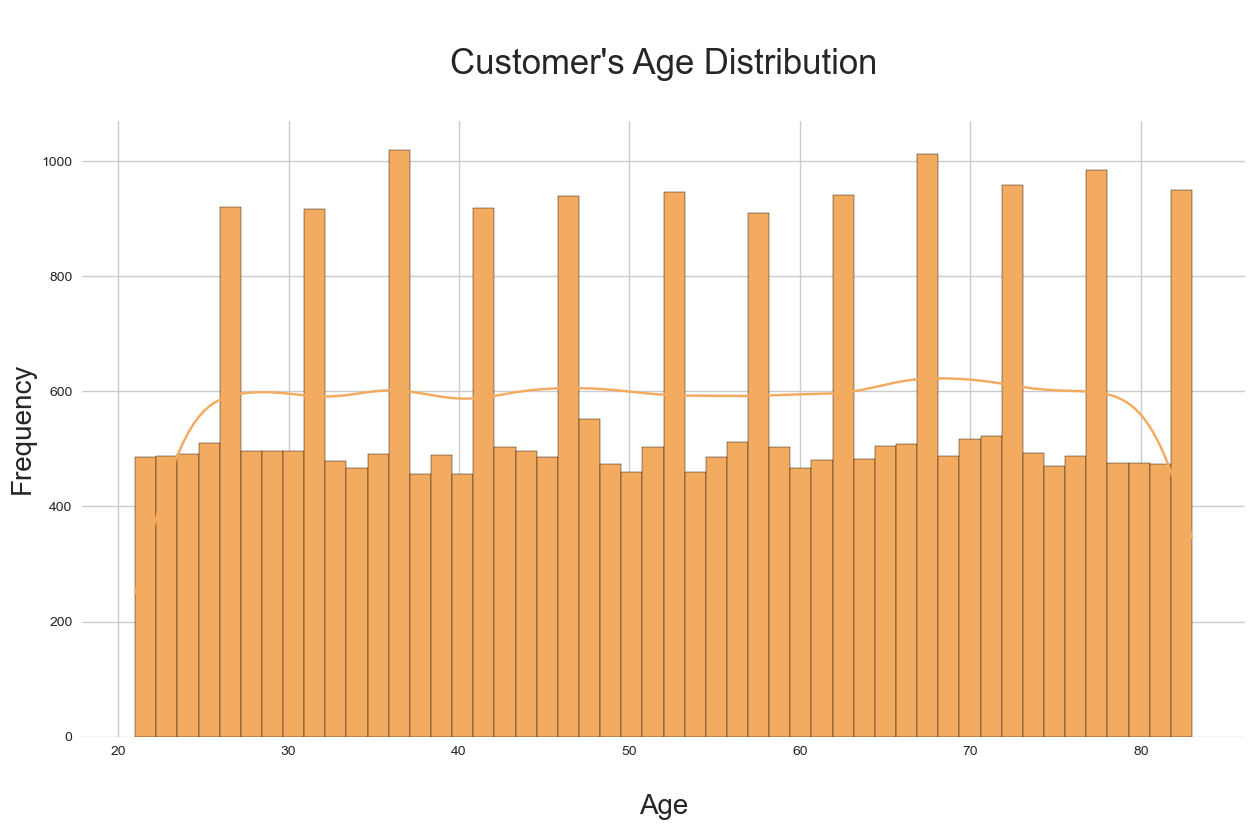

In [23]:
plt.subplots(figsize=(15, 8))
p = sns.histplot(info["customer_age"],color="#F3AB60",kde=True,bins=50,alpha=1,fill=True,edgecolor="black")
p.axes.lines[0]
p.axes.set_title("\nCustomer's Age Distribution\n",fontsize=25)
plt.ylabel("Frequency",fontsize=20)
plt.xlabel("\nAge",fontsize=20)
sns.despine(left=True, bottom=True)

plt.show()

The histogram above illustrates the distribution of customer ages, revealing a surprising finding of a relatively uniform distribution. This result challenges the typical expectation of a higher density of individuals within specific age groups.

<br>

**4. Children histogram**

To get a visual insight into the customer's children distribution, a histogram is used.

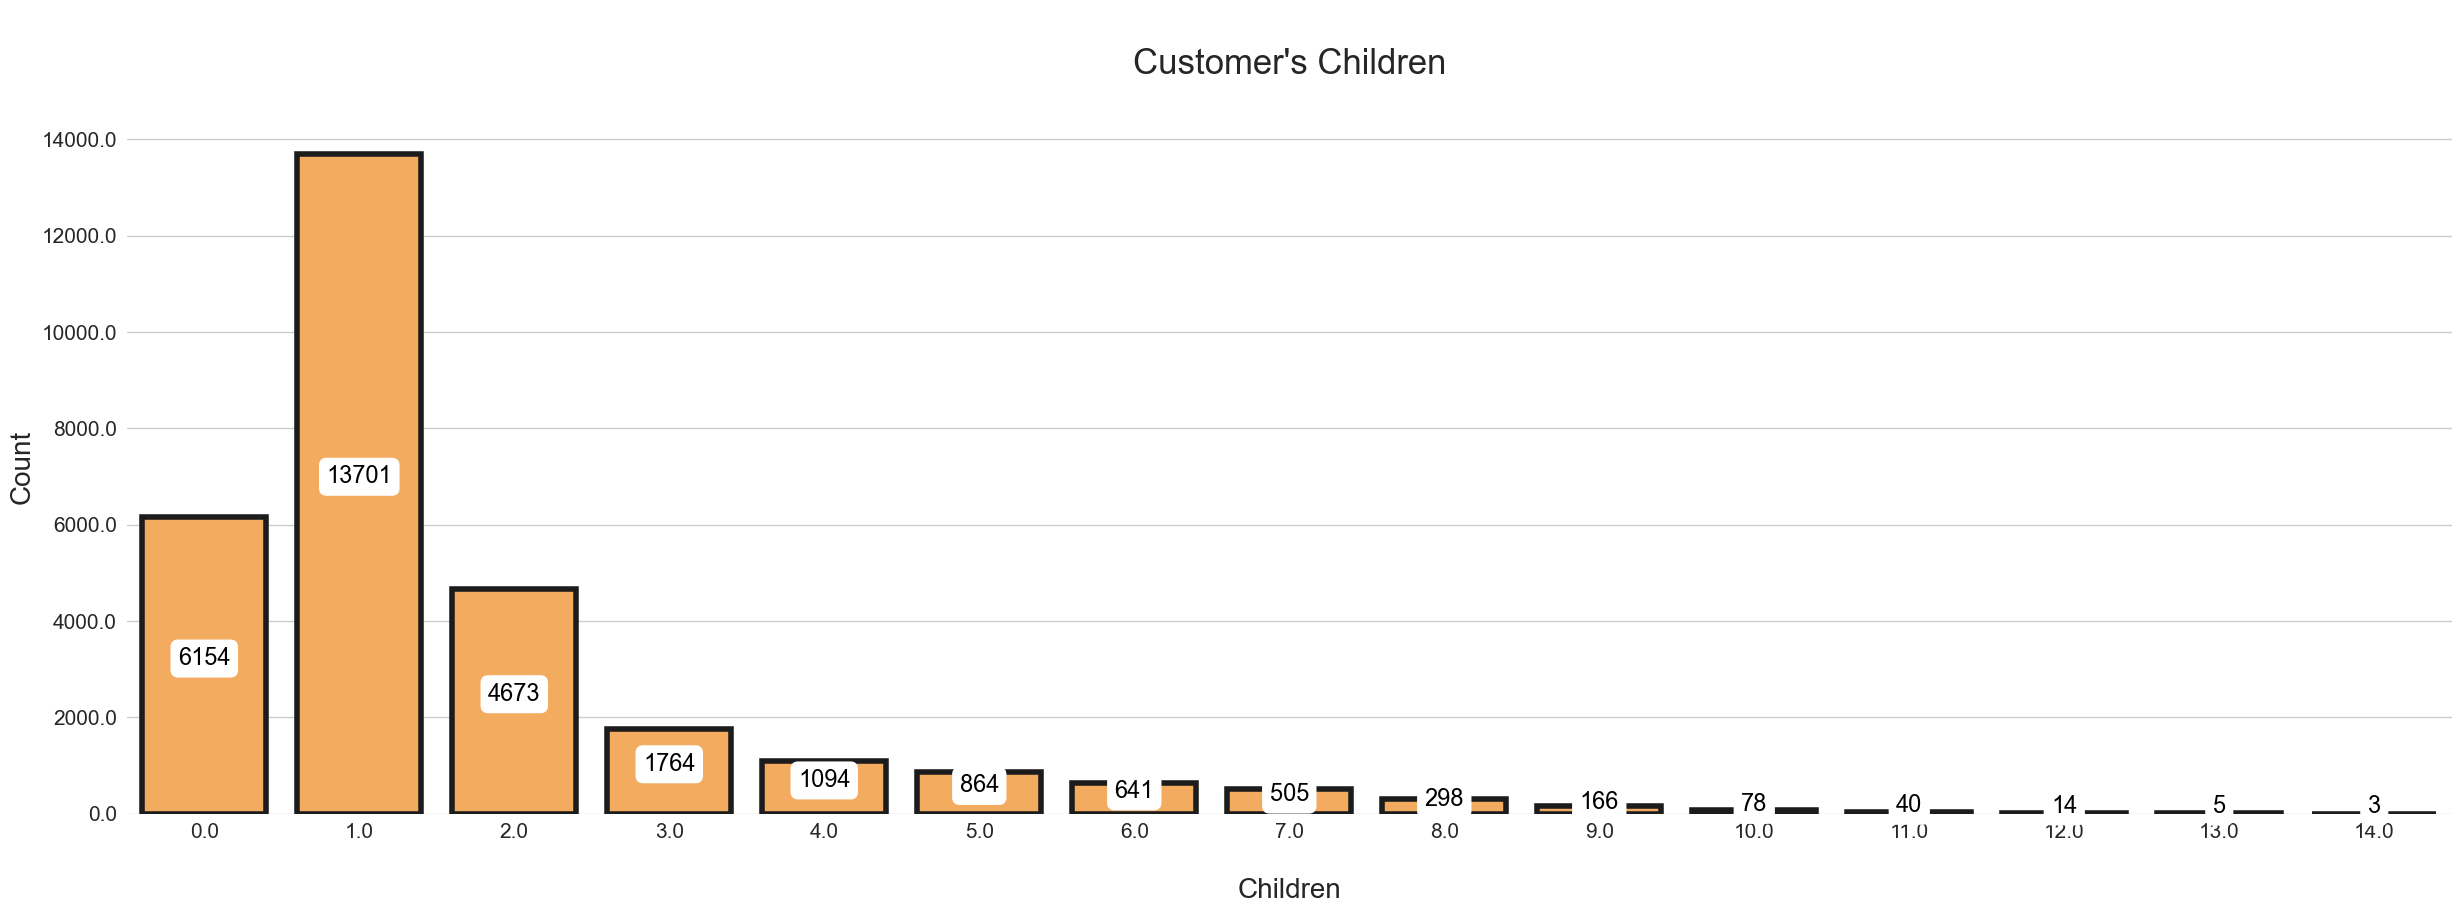

In [22]:
plt.subplots(figsize=(30, 9))
p = sns.countplot(x=info["num_kids"],palette=["#F3AB60"], saturation=1,edgecolor = "#1c1c1c", linewidth = 4)
p.axes.set_yscale("linear")
p.axes.set_title("\nCustomer's Children\n",fontsize=25)
p.axes.set_ylabel("Count",fontsize=20)
p.axes.set_xlabel("\nChildren",fontsize=20)
p.axes.set_xticklabels(p.get_xticklabels(),rotation = 0, fontsize=15)
p.axes.set_yticklabels(p.get_yticks(), fontsize=15) 

for container in p.containers:
    p.bar_label(container,label_type="center",padding=5,size=17,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "white", "edgecolor": "white",
                          "linewidth": 4, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

The output image shows a skewed histogram, as expected. The majority of the customers has within three children, although there is a significant amount of customers that have several children.

<br><br>

### **Exporting the data**

The transformed data is now exported as a csv file, named 'eda_info.csv'.

In [25]:
info.to_csv(path +"eda_info.csv", index=False)